# 1 - Entendimento do problema - O problema a ser solucionado.

O projeto visa indicar qual perfil de investidor é mais adequado com base no comportamento do mercado de bitcoin. 

1.1 - Quais são os perfis de investidores?

- Conservadores, moderados e arrojados.

1.1.2 - Quais a bases fundamentais dos perfis? 

- Segurança
- Liquidez
- Rentabilidade

1.1.3 - Como influenciam no perfil dos investidores?

- Conservadores: Segurança como prioridade.
- Moderados:

1.1.4 - Quais são os indicadores de determinantes para a escolha?

#2 - Coleta de dados e referências do projeto

Conjunto de dados utilizado:

 https://www.kaggle.com/mczielinski/bitcoin-historical-data

Referências:

https://www.notion.so/https-towardsdatascience-com-dynamic-cryptocurrency-trading-backtesting-platform-python-219dfcd742-eb894aef1a504d6fb363e3854f870350


# 3 - Análise, interpretação e Visualização 


Bibliotecas utilizadas


In [ ]:
#manipulação de dados
import pandas as pd
import numpy as np
from scipy.stats import norm

#Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [ ]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1994923,1445401620,270.00,270.00,269.89,269.89,2.081360,561.783405,269.911695
1994924,1445401680,270.15,270.15,270.15,270.15,1.080000,291.762000,270.150000
1994925,1445401740,270.15,270.15,269.99,270.15,0.491500,132.775285,270.143001
1994926,1445401800,269.99,270.13,269.88,270.13,2.828548,763.473191,269.916955


Primeria inspecção dos dados 


In [ ]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Inspecionando o tamanho do dataframe
df.size

15959424

In [ ]:
#Inspecionando a forma do df.
df.shape

(1994928, 8)

In [ ]:
#Informações iniciais
df.info

<bound method DataFrame.info of           Timestamp    Open  ...  Volume_(Currency)  Weighted_Price
0        1325317920    4.39  ...           2.000000        4.390000
1        1325317980     NaN  ...                NaN             NaN
2        1325318040     NaN  ...                NaN             NaN
3        1325318100     NaN  ...                NaN             NaN
4        1325318160     NaN  ...                NaN             NaN
...             ...     ...  ...                ...             ...
1994923  1445401620  270.00  ...         561.783405      269.911695
1994924  1445401680  270.15  ...         291.762000      270.150000
1994925  1445401740  270.15  ...         132.775285      270.143001
1994926  1445401800  269.99  ...         763.473191      269.916955
1994927  1445401860  269.93  ...          18.369000             NaN

[1994928 rows x 8 columns]>

In [ ]:
#verificando o tipo dos dados
df.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [ ]:
#obtendo informações estatísticas iniciais. 
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,1.994928e+06,1.035329e+06,1.035329e+06,1.035329e+06,1.035329e+06,1.035329e+06,1.035329e+06,1.035328e+06
mean,1.385245e+09,3.508009e+02,3.511180e+02,3.504601e+02,3.507971e+02,1.404526e+01,4.953575e+03,3.507787e+02
std,3.466306e+07,2.311158e+02,2.314100e+02,2.308053e+02,2.311195e+02,4.707234e+01,1.986629e+04,2.310968e+02
min,1.325318e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.355242e+09,1.957400e+02,1.959500e+02,1.955000e+02,1.957300e+02,5.285200e-01,1.196200e+02,1.957100e+02
50%,1.385166e+09,2.743600e+02,2.745200e+02,2.741400e+02,2.743500e+02,2.232715e+00,5.645470e+02,2.743495e+02
75%,1.415090e+09,5.029500e+02,5.033800e+02,5.024400e+02,5.029600e+02,9.824200e+00,2.714607e+03,5.028865e+02
max,1.445402e+09,1.163000e+03,1.163000e+03,1.162990e+03,1.163000e+03,5.853852e+03,1.865889e+06,1.163000e+03


In [ ]:
#dados faltantes, todas as features com 1243608 dados faltantes.
df.isnull().sum()

Timestamp                 0
Open                 959599
High                 959599
Low                  959599
Close                959599
Volume_(BTC)         959599
Volume_(Currency)    959599
Weighted_Price       959600
dtype: int64

In [ ]:
#correlação entre as features
corr=df.corr()
corr

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,1.000000,0.097055,0.096662,0.097490,0.097067,-0.021778,-0.004120,0.097086
Open,0.097055,1.000000,0.999990,0.999989,0.999987,0.002744,0.175662,0.999993
High,0.096662,0.999990,1.000000,0.999978,0.999990,0.003747,0.176936,0.999992
Low,0.097490,0.999989,0.999978,1.000000,0.999989,0.001427,0.174000,0.999993
Close,0.097067,0.999987,0.999990,0.999989,1.000000,0.002552,0.175435,0.999994
Volume_(BTC),-0.021778,0.002744,0.003747,0.001427,0.002552,1.000000,0.832066,0.002463
Volume_(Currency),-0.004120,0.175662,0.176936,0.174000,0.175435,0.832066,1.000000,0.175316
Weighted_Price,0.097086,0.999993,0.999992,0.999993,0.999994,0.002463,0.175316,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

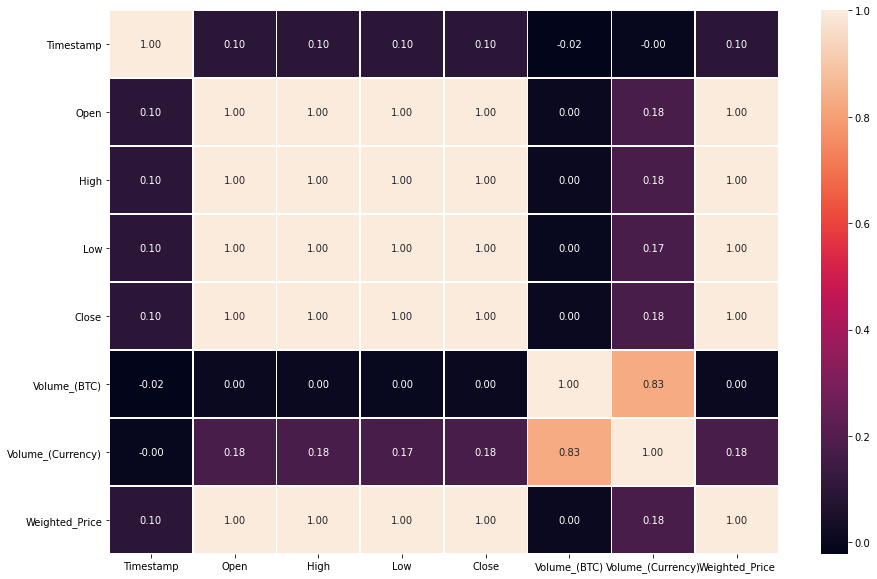

In [ ]:
plt.figure(figsize=(15,10))
corr
sns.heatmap(data=corr, annot=True, linewidths=0.5, fmt=".2f",cmap="rocket")
plt.xticks(rotation=0)

#Correlação entre as features.

1 - Timestamp tem grande correlação com as features Close, Low, High e open. Baixa correlação com BTC e Currency. 

2 - Open, high, low e close têm entre si grande correlação. (esperado).

3 - BTC e  CURRENCY têm moderada correlação entre si, baixa com as demais features. 

4 - WEIGHTED PRICE tem alta correlação com as features timestamp, open, high, low e close. E baixa com as fetures BTC E CURRENCY. 





##Dicionário de dados

1 - Timestamp - Hora de início da janela. Janelas de 60s em unidade de time unix. Tipo - int.

2 - Open - Valor de abertura no início da janela. Tipo de dado - float.

3 - High - Valor mais alto durante a janela. Tipo de dado - float.

4 - Low - Valor mais baixo durante a janela. Tipo de dado - float. 

5 - Close - Valor no fechamento da janela. Tipo de dado - float. 

6 - Volume BTC - Volume de bitcoin transacionado na respectiva janela. Tipo de dado - float.

7 - Volume currency - Volume total de cryptomoedas transacionadas na respectiva janela. Tipo de dado - float.

8 - Weighted Price - VWAP - Preço médio ponderado por volume. É obtido da razão entre o somatório do produto do número de bitcoin comprado pelo preço, e o total de bitcoin comprado. Tipo de dado - float.  

#Dados faltantes.

A abordagem adotada com relação aos NaN presentes no conjunto de dados foi de, a princípio, não leva-los em consideração deste ponto em diante. Devido ao fato de serem apenas dados faltantes que não deverão influenciar no presente projeto.


In [ ]:
#Cópia do df para exclusão dos faltantes.
df_sem_faltantes= df.copy()

In [ ]:
df_sem_faltantes.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Excluindo os dados faltantes (NaN)
df_sem_faltantes.dropna(inplace=True)

In [ ]:
#Nova forma (tamanho) do dataframe
df_sem_faltantes.shape

(1035328, 8)

In [ ]:
df_sem_faltantes.size

8282624

In [ ]:
#Verificando
df_sem_faltantes.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [ ]:
#Verificando em todo o dataframe.
df_sem_faltantes.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

#Análise das features

Timestamp:
  Hora de início da janela. Janelas de 60s em unidade de time unix.

In [ ]:
df_sem_faltantes["Timestamp"]

0          1325317920
478        1325346600
547        1325350740
548        1325350800
1224       1325391360
              ...    
1994922    1445401560
1994923    1445401620
1994924    1445401680
1994925    1445401740
1994926    1445401800
Name: Timestamp, Length: 1035328, dtype: int64

In [ ]:
#Verificando o tipo
df_sem_faltantes["Timestamp"].dtypes

dtype('int64')

In [ ]:
#Verificando dados faltantes
df_sem_faltantes["Timestamp"].isnull().sum()

0

In [ ]:
#Informações estátisticas sobre a feature
df_sem_faltantes["Timestamp"].describe()

count    1.035328e+06
mean     1.401902e+09
std      2.492715e+07
min      1.325318e+09
25%      1.382852e+09
50%      1.401505e+09
75%      1.422779e+09
max      1.445402e+09
Name: Timestamp, dtype: float64

#Open

Valor de abertura da janela. 


In [ ]:
df_sem_faltantes["Open"]

0            4.39
478          4.39
547          4.50
548          4.58
1224         4.58
            ...  
1994922    270.53
1994923    270.00
1994924    270.15
1994925    270.15
1994926    269.99
Name: Open, Length: 1035328, dtype: float64

In [ ]:
#Informações estatísticas iniciais
df_sem_faltantes["Open"].describe()

count    1.035328e+06
mean     3.508010e+02
std      2.311159e+02
min      3.800000e+00
25%      1.957375e+02
50%      2.743600e+02
75%      5.029500e+02
max      1.163000e+03
Name: Open, dtype: float64

In [ ]:
#Verificando para dados faltantes 
df_sem_faltantes["Open"].isnull().sum()

0

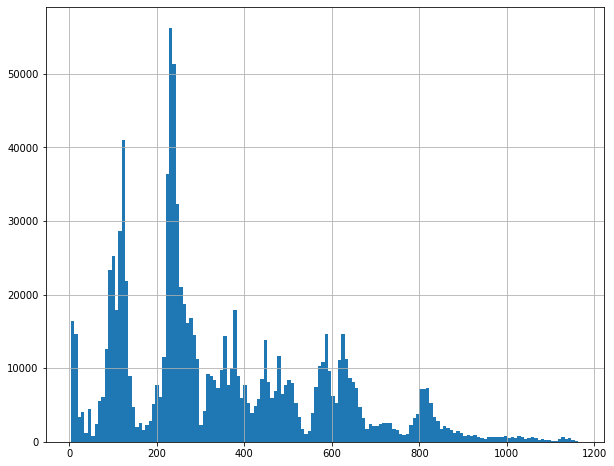

In [ ]:
df_sem_faltantes["Open"].hist(bins=150, figsize=(10,8))

In [ ]:
#Verificando a curtose da distribuição 
df_sem_faltantes["Open"].kurtosis()

0.009735616670740299

In [ ]:
#Verificando a simetria da distribuição 
df_sem_faltantes["Open"].skew()

0.7978805902401934

In [ ]:
x_list=np.linspace(df_sem_faltantes.Open.min(),df_sem_faltantes.Open.max(), 100)
y_list=norm.pdf(x_list,loc=df_sem_faltantes.Open.mean(), scale=df_sem_faltantes.Open.std())

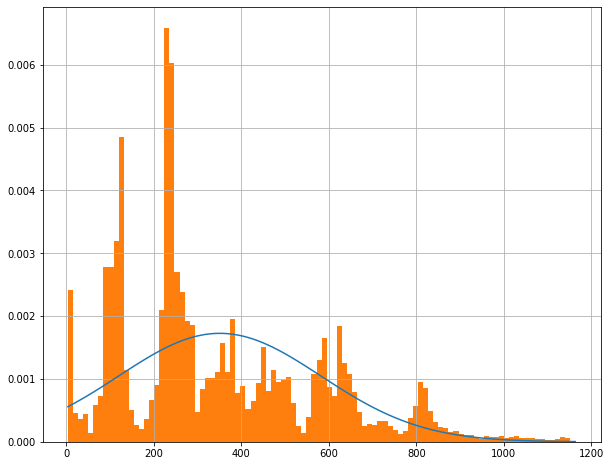

In [ ]:
plt.plot(x_list,y_list)
df_sem_faltantes["Open"].hist(bins=100, figsize=(10,8), density=True)


